In [8]:
import pygmt
import pandas as pd

Load data

In [9]:
df = pd.read_csv('Focales.txt', sep=" ", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-71.87,-65.47,23,1.09,4.33,-5.42,0.88,0.55,4.08,24,X,Y,202201052324A,NaN,NaN
1,-25.64,-59.99,39,0.70,0.14,-0.83,-0.25,0.28,-0.41,24,X,Y,202201061216A,NaN,NaN
2,28.11,-52.43,22,-0.52,2.89,-2.37,0.61,-0.06,3.21,23,X,Y,202201090753A,NaN,NaN
3,-128.84,-55.35,19,-0.39,2.53,-2.14,0.03,0.62,3.10,24,X,Y,202201151823A,NaN,NaN
4,-24.97,-58.03,56,0.67,0.19,-0.86,0.00,-0.02,0.25,24,X,Y,202201152357A,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,-179.68,-65.27,15,-2.92,7.22,-4.30,-2.06,1.49,-0.53,23,X,Y,202212261510A,NaN,NaN
211,-24.39,-57.09,12,5.06,0.71,-5.77,-1.33,3.40,0.94,23,X,Y,202212262336A,NaN,NaN
212,27.85,-52.66,12,-1.27,6.69,-5.41,1.03,-0.17,2.29,23,X,Y,202212302102A,NaN,NaN
213,28.02,-52.66,18,0.14,1.40,-1.54,-0.71,-0.54,1.48,23,X,Y,202212302245A,NaN,NaN


Clean data and define new headers

In [10]:

df = df.iloc[:, :-5]
headers = ['longitude', 'latitude', 'depth', 'mrr', 'mtt', 'mff', 'mrt', 'mrf', 'mtf', 'exponent']

df.columns=headers

# Add plot longitude and plot latitude columns
df['plot_longitude'] = df['longitude'].copy()
df['plot_latitude'] = df['latitude'].copy()
df

,longitude,latitude,depth,mrr,mtt,mff,mrt,mrf,mtf,exponent,plot_longitude,plot_latitude
0,-71.87,-65.47,23,1.09,4.33,-5.42,0.88,0.55,4.08,24,-71.87,-65.47
1,-25.64,-59.99,39,0.70,0.14,-0.83,-0.25,0.28,-0.41,24,-25.64,-59.99
2,28.11,-52.43,22,-0.52,2.89,-2.37,0.61,-0.06,3.21,23,28.11,-52.43
3,-128.84,-55.35,19,-0.39,2.53,-2.14,0.03,0.62,3.10,24,-128.84,-55.35
4,-24.97,-58.03,56,0.67,0.19,-0.86,0.00,-0.02,0.25,24,-24.97,-58.03
...,...,...,...,...,...,...,...,...,...,...,...,...
210,-179.68,-65.27,15,-2.92,7.22,-4.30,-2.06,1.49,-0.53,23,-179.68,-65.27
211,-24.39,-57.09,12,5.06,0.71,-5.77,-1.33,3.40,0.94,23,-24.39,-57.09
212,27.85,-52.66,12,-1.27,6.69,-5.41,1.03,-0.17,2.29,23,27.85,-52.66
213,28.02,-52.66,18,0.14,1.40,-1.54,-0.71,-0.54,1.48,23,28.02,-52.66


In [11]:
region = [-180, 180, -90, -50]

In [12]:
fig = pygmt.Figure()

# Create a colormap for depth values
pygmt.makecpt(cmap="jet", series=[df['depth'].min(), df['depth'].max()])

# Plot the topography and coordinate grid
fig.grdimage('@earth_relief_01m', region=region, projection='D0/-70/-90/-49/12c', cmap='geo')
fig.basemap(region=region, projection='D-0/70/-90/-49/12c', frame=True)

Plot the focal mechanisms

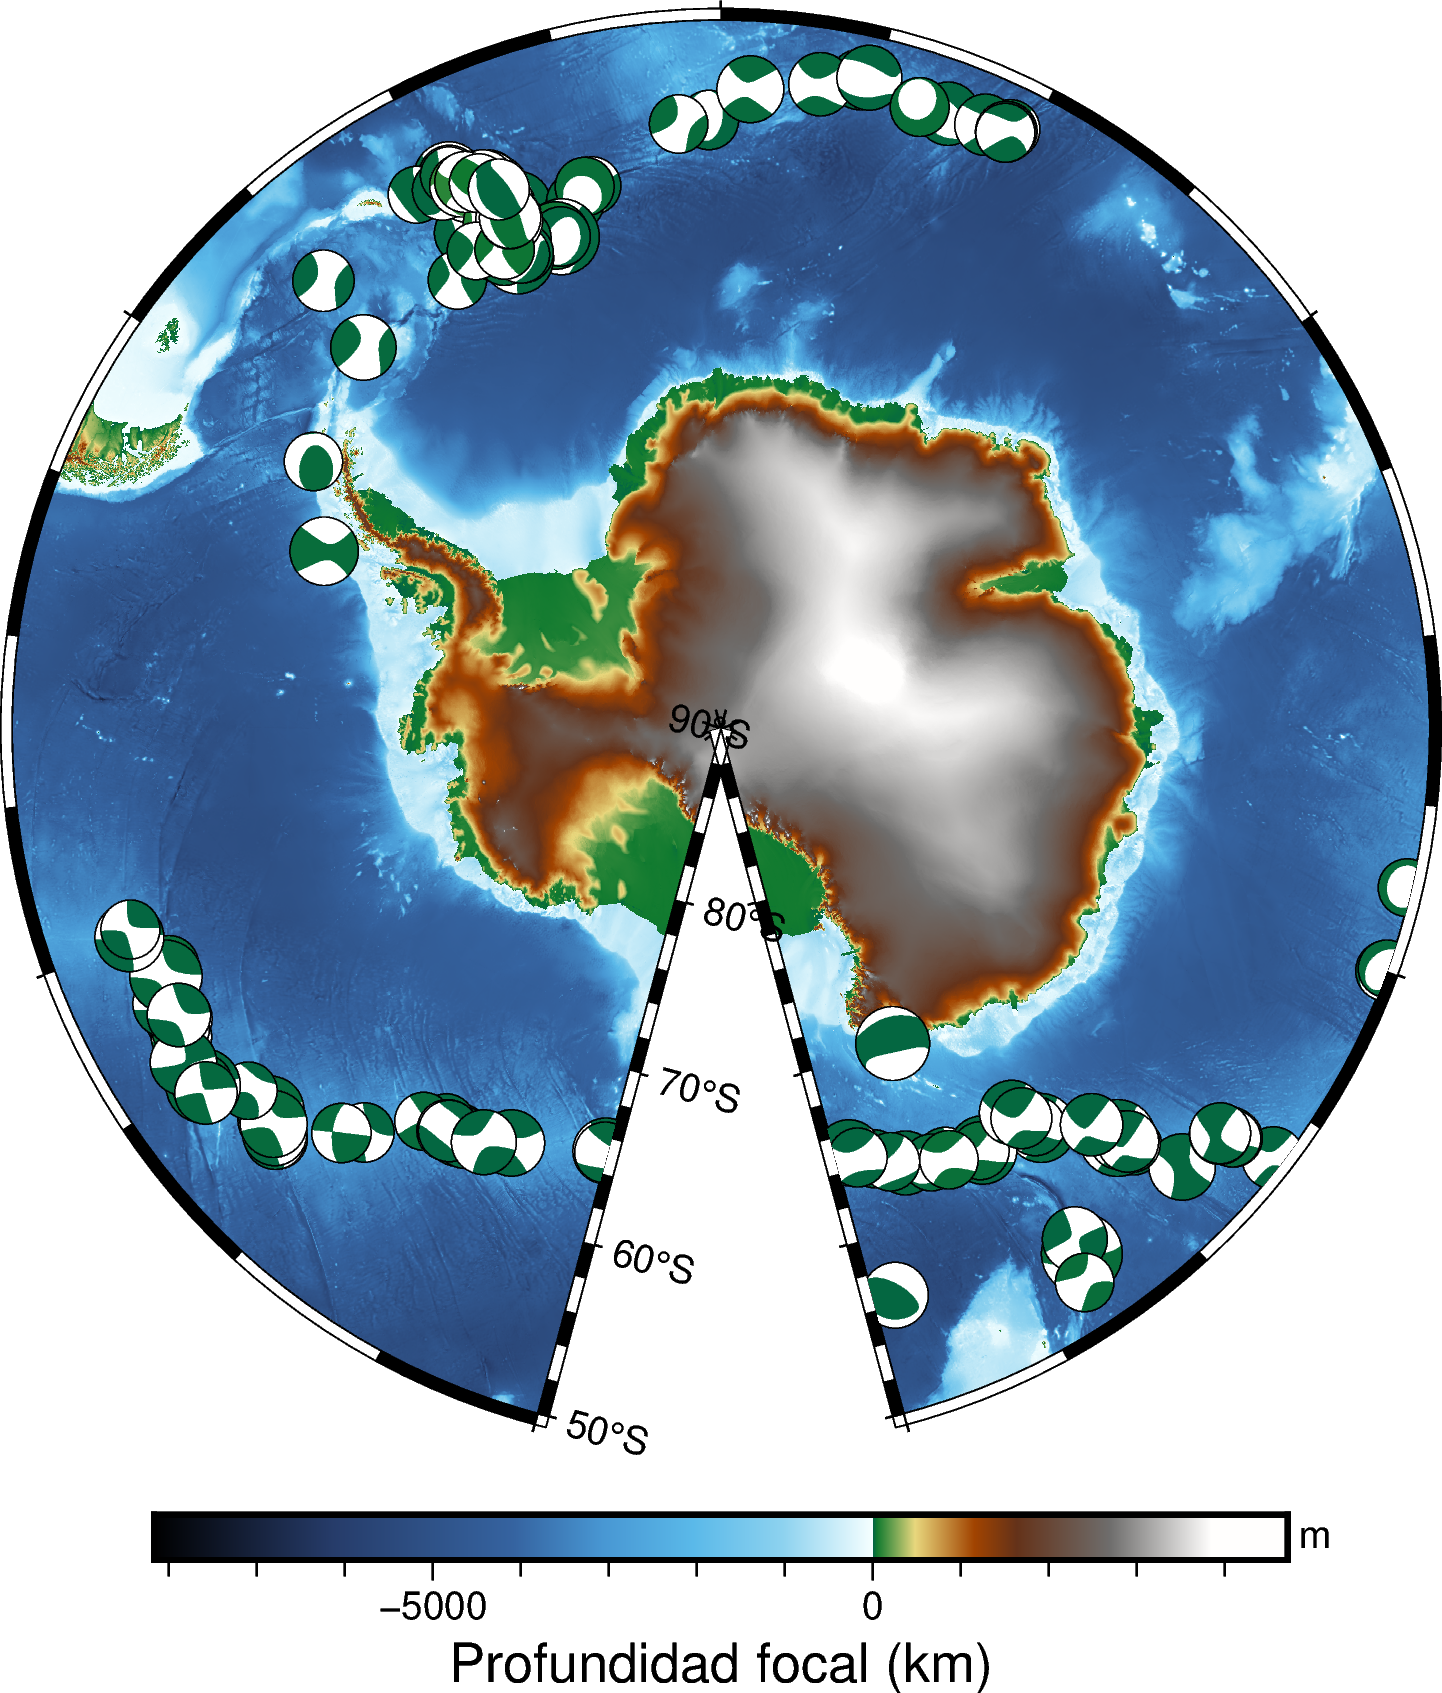

In [13]:
fig.meca(
    spec=df,
    scale='0.5c',
    projection='D0/-70/-90/-49/12c',
    region=region,
    cmap=True
)


# Add colorbar with label "Profundidad focal (km)"
fig.colorbar(frame=["x+lProfundidad focal (km)", "y+lm"])

fig.show()